In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.6.0, 2.6.1, 2.7.0rc0, 2.7.0rc1)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc0


In [ ]:
# Dataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/movies-poster_Dataset.git

fatal: destination path 'movies-poster_Dataset' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv('/content/movies-poster_Dataset/train.csv')
data.shape

(7254, 27)

In [ ]:
data =data.iloc[:2000]

In [ ]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/movies-poster_Dataset/Images/' + data['Id'][i] + '.jpg' 
  img = image.load_img(path,target_size=(img_width,img_height,3))
  img = image.img_to_array(img) #convert to array
  img = img/255 # normalization
  X.append(img)

X = np.array(X)

100%|██████████| 2000/2000 [00:07<00:00, 252.19it/s]


In [ ]:
X.shape

(2000, 350, 350, 3)

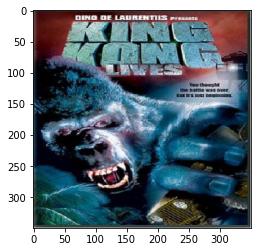

In [38]:
plt.imshow(X[500])

In [39]:
print(data['Id'][500])  #King Kong

print(data['Genre'][500])  #Tagged as multiple Genres.


tt0091344
['Action', 'Adventure', 'Horror']


In [40]:
y = np.array(data.drop(['Id', 'Genre'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [41]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(img_height,img_width,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 346, 346, 16)      1216      
_________________________________________________________________
batch_normalization_5 (Batch (None, 346, 346, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 173, 173, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 173, 173, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 169, 169, 32)      12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 84, 84, 32)       

In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
22/22 [==============================] - 406s 18s/step - loss: 0.8572 - accuracy: 0.0900 - val_loss: 0.4775 - val_accuracy: 0.3283
Epoch 2/10
22/22 [==============================] - 402s 18s/step - loss: 0.5758 - accuracy: 0.1093 - val_loss: 0.3171 - val_accuracy: 0.3317
Epoch 3/10
22/22 [==============================] - 398s 18s/step - loss: 0.4717 - accuracy: 0.1207 - val_loss: 0.2787 - val_accuracy: 0.2767
Epoch 4/10
22/22 [==============================] - 400s 18s/step - loss: 0.4081 - accuracy: 0.1514 - val_loss: 0.2733 - val_accuracy: 0.1900
Epoch 5/10
22/22 [==============================] - 402s 18s/step - loss: 0.3727 - accuracy: 0.1679 - val_loss: 0.2895 - val_accuracy: 0.1900
Epoch 6/10
22/22 [==============================] - 404s 18s/step - loss: 0.3507 - accuracy: 0.1743 - val_loss: 0.2881 - val_accuracy: 0.2017
Epoch 7/10
22/22 [==============================] - 405s 18s/step - loss: 0.3305 - accuracy: 0.2000 - val_loss: 0.2540 - val_accuracy: 0.1900
Epoch 

In [46]:
model.save_weights("model.h5")

In [51]:
model.save("movie_genre.h5")

In [52]:
k = '/content/movie_genre.h5'

In [58]:
from keras.models import load_model

In [64]:
k.load_weights("movie_genre.h5")

In [65]:
k.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 346, 346, 16)      1216      
_________________________________________________________________
batch_normalization_5 (Batch (None, 346, 346, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 173, 173, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 173, 173, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 169, 169, 32)      12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 84, 84, 32)       

In [68]:
history.history['loss']

[0.8572020530700684,
 0.5757507681846619,
 0.47165679931640625,
 0.4081260859966278,
 0.3727388083934784,
 0.3507102429866791,
 0.3304910361766815,
 0.31297051906585693,
 0.30460187792778015,
 0.29425889253616333]

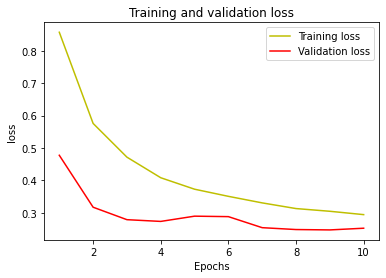

In [77]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


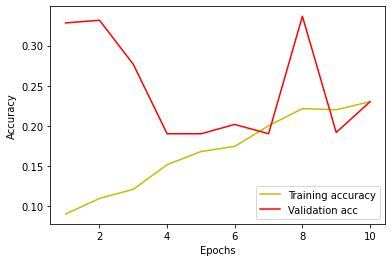

In [83]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Testing the model

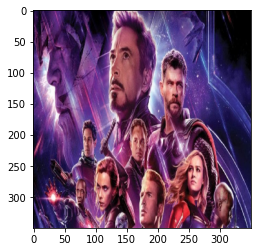

In [160]:
## Check for the image

img = image.load_img('/content/movies-poster_Dataset/endgame.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)

# convert to numpy array
img = image.img_to_array(img)
#Normalize
img = img/255.0
#reshaping
img = img.reshape(1,img_width,img_height,3)



In [161]:
# Get the target classes

classes = data.columns[2:] # get eveerything after id and genre
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [162]:
# Get the predicted probability for label img

y_prob = model.predict(img)
y_prob

array([[0.14937085, 0.11739877, 0.00969481, 0.02055907, 0.4766729 ,
        0.2497648 , 0.00817558, 0.49372727, 0.05410635, 0.09258297,
        0.03455272, 0.02682987, 0.04384935, 0.0021314 , 0.02581006,
        0.00292981, 0.01201203, 0.0210717 , 0.17438942, 0.07862428,
        0.00194612, 0.02457693, 0.13648951, 0.00991717, 0.00204271]],
      dtype=float32)

In [163]:
# sort them and get top 3 prediction
top3 = np.argsort(y_prob[0])[:-4:-1]
top3

array([7, 4, 5])

In [164]:
# print classes of above three
for i in range(3):
  print(classes[top3][i],y_prob[0][top3[i]])

Drama 0.49372727
Comedy 0.4766729
Crime 0.2497648


In [165]:
y_prob[0]

array([0.14937085, 0.11739877, 0.00969481, 0.02055907, 0.4766729 ,
       0.2497648 , 0.00817558, 0.49372727, 0.05410635, 0.09258297,
       0.03455272, 0.02682987, 0.04384935, 0.0021314 , 0.02581006,
       0.00292981, 0.01201203, 0.0210717 , 0.17438942, 0.07862428,
       0.00194612, 0.02457693, 0.13648951, 0.00991717, 0.00204271],
      dtype=float32)